In [82]:
import numpy as np
import pandas as pd

from sklearn.metrics import f1_score
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

### Normalização por coluna

In [ ]:
df = pd.read_csv(r'C:\Users\joaov_zm1q2wh\python\icassp_challenge\joao\data\features_all.csv')

X = df.drop(columns=["ID", "Class"])
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.to_csv(r'C:\Users\joaov_zm1q2wh\python\icassp_challenge\joao\data\features_normalized_column.csv', index=False)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Normalização por linha

In [ ]:
df = pd.read_csv(r'C:\Users\joaov_zm1q2wh\python\icassp_challenge\joao\data\features_all.csv')

X = df.drop(columns=["ID", "Class"])
y = df["Class"]

cols_com_nan = X.columns[X.isna().any()]
print("Colunas com NaN:", cols_com_nan)

linhas_com_nan = X[X["NHRPA"].isna()].index
print("Linhas com NaN em NHRPA:", linhas_com_nan)
print("Valores problemáticos em NHRPA:\n", X.loc[linhas_com_nan, "NHRPA"])

X = X.dropna(subset=["NHRPA"])
y = y[X.index]

X = X.astype(float)

X_normalized = normalize(X, axis=1)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns, index=X.index)

print("X_normalized dtypes:\n", X_normalized.dtypes)
print("X_normalized shape:", X_normalized.shape)

X_normalized.to_csv(r'C:\Users\joaov_zm1q2wh\python\icassp_challenge\joao\data\features_all_normalized.csv', index=False)

X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

Colunas com NaN: Index(['NHRPA'], dtype='object')
Linhas com NaN em NHRPA: Index([30, 170], dtype='int64')
Valores problemáticos em NHRPA:
 30    NaN
170   NaN
Name: NHRPA, dtype: float64
X_normalized dtypes:
 Age                  float64
Sex                  float64
F0_mean_HzA          float64
F0_max_HzA           float64
F0_min_HzA           float64
                      ...   
F0_std_HzTA          float64
Jitter_percentTA     float64
Shimmer_percentTA    float64
HNR_dBTA             float64
NHRTA                float64
Length: 66, dtype: object
X_normalized shape: (270, 66)
Acurácia treino: 0.9212962962962963
Acurácia teste: 0.42592592592592593

Relatório de classificação (teste):
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         5
           3       0.33      0.18      0.24        11
           4       0.40      0.27      0.32        15
           5       0.45      0.77 

c:\Users\joaov_zm1q2wh\python\icassp_challenge\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\joaov_zm1q2wh\python\icassp_challenge\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\joaov_zm1q2wh\python\icassp_challenge\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

### Análise

Acurácia treino: 0.8986175115207373
Acurácia teste: 0.34545454545454546

Relatório de classificação (teste):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         5
           3       0.43      0.25      0.32        12
           4       0.10      0.07      0.08        15
           5       0.39      0.68      0.50        22

    accuracy                           0.35        55
   macro avg       0.18      0.20      0.18        55
weighted avg       0.28      0.35      0.29        55


Matriz de confusão (teste):
[[ 0  0  1  0  0]
 [ 0  0  1  1  3]
 [ 0  0  3  2  7]
 [ 0  0  1  1 13]
 [ 0  0  1  6 15]]


c:\Users\joaov_zm1q2wh\python\icassp_challenge\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\joaov_zm1q2wh\python\icassp_challenge\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\joaov_zm1q2wh\python\icassp_challenge\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

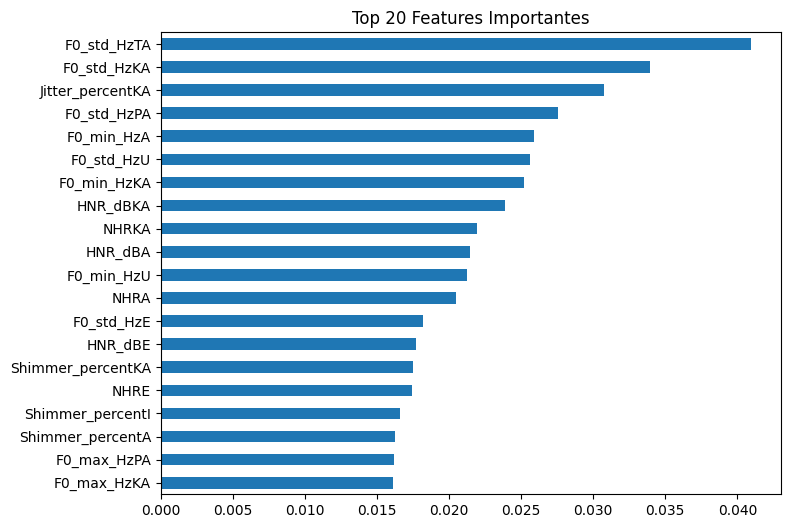

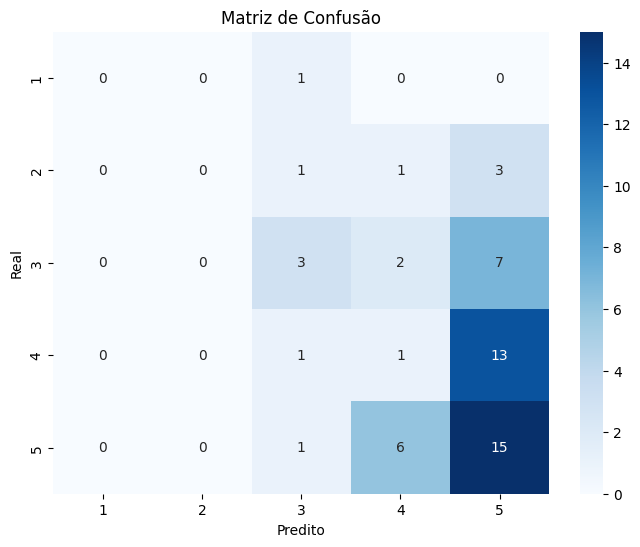

In [76]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print("Acurácia treino:", accuracy_score(y_train, y_train_pred))
print("Acurácia teste:", accuracy_score(y_test, y_test_pred))

print("\nRelatório de classificação (teste):")
print(classification_report(y_test, y_test_pred))

print("\nMatriz de confusão (teste):")
print(confusion_matrix(y_test, y_test_pred))

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(20).sort_values().plot(kind="barh", figsize=(8, 6), title="Top 20 Features Importantes")
plt.show()

cm = confusion_matrix(y_test, y_test_pred)
labels = sorted(y_test.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

Aqui peguei os IDs usados como validação no BASELINE.

Acurácia treino: 0.9223744292237442
Acurácia teste: 0.5849056603773585

Relatório de classificação (teste):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.43      0.50      0.46        12
           4       0.75      0.43      0.55        14
           5       0.61      0.90      0.73        21

    accuracy                           0.58        53
   macro avg       0.36      0.37      0.35        53
weighted avg       0.54      0.58      0.54        53



c:\Users\joaov_zm1q2wh\python\icassp_challenge\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\joaov_zm1q2wh\python\icassp_challenge\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\joaov_zm1q2wh\python\icassp_challenge\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

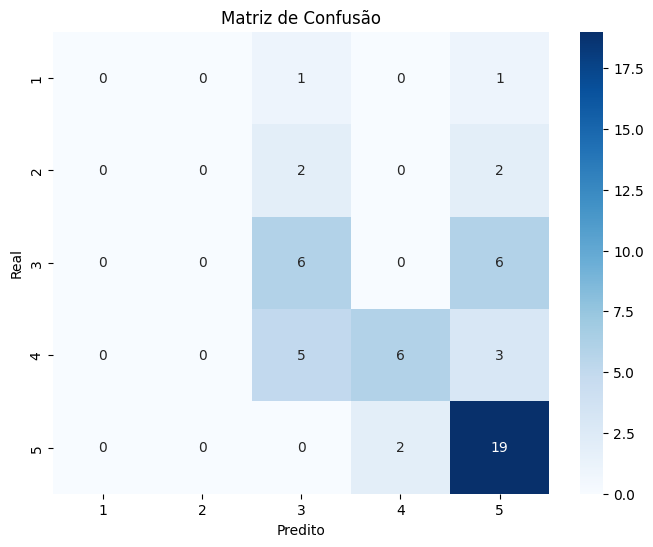

In [109]:
df = pd.read_csv(r'C:\Users\joaov_zm1q2wh\python\icassp_challenge\joao\data\features_all.csv')

cols_to_drop = [col for col in df.columns if col.startswith("NHR")]
cols_to_drop = [col for col in df.columns if col.startswith("F0_max")]
cols_to_drop = [col for col in df.columns if col.startswith("F0_min")]
# cols_to_drop = [col for col in df.columns if col.startswith("Age")]
# cols_to_drop = [col for col in df.columns if col.startswith("Sex")]

df = df.drop(columns=cols_to_drop)

test_ids = [
    "ID007","ID012","ID021","ID029","ID037","ID046","ID051","ID053","ID054","ID056",
    "ID063","ID075","ID083","ID090","ID099","ID101","ID105","ID110","ID116","ID122",
    "ID129","ID136","ID138","ID140","ID158","ID160","ID164","ID171","ID176","ID179",
    "ID202","ID209","ID227","ID229","ID233","ID245","ID252","ID253","ID260","ID261",
    "ID263","ID264","ID269","ID270","ID274","ID278","ID284","ID286","ID290","ID302",
    "ID306","ID323","ID329"
]

train_df = df[~df["ID"].isin(test_ids)].reset_index(drop=True)
test_df  = df[df["ID"].isin(test_ids)].reset_index(drop=True)

X_train = train_df.drop(columns=["ID", "Class"])
y_train = train_df["Class"]

X_test = test_df.drop(columns=["ID", "Class"])
y_test = test_df["Class"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_scaled, y_train)

y_train_pred = rf.predict(X_train_scaled)
y_test_pred  = rf.predict(X_test_scaled)

print("Acurácia treino:", accuracy_score(y_train, y_train_pred))
print("Acurácia teste:", accuracy_score(y_test, y_test_pred))
print("\nRelatório de classificação (teste):")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
labels = sorted(y_test.unique())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

In [104]:
avg_f1_score = f1_score(y_test, y_test_pred, average='macro')
print("Average F1-score (teste):", avg_f1_score)

Average F1-score (teste): 0.3027477211620434
